# **Data Analysis On Video Game Sales And Ratings**
Dataset from: https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings

## **0. Imports and Setup**

In [482]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

## **1. Exploratory Data Analysis**

### **1.1 Overview**

In [483]:
video_games_df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

print('Number of data points = {}'.format(video_games_df.shape[0]))
print('Shape: {}'.format(video_games_df.shape))
print('Columns: {}'.format(list(video_games_df.columns)))

Number of data points = 16719
Shape: (16719, 16)
Columns: ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']


In [484]:
print(video_games_df.info())
video_games_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB
None


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


This dataset contains 16719 video games and the 16 following features:

-**Name**: The title of the video game.<br>
-**Platform**: The video game console (or PC) that the video game was released on.<br>
-**Year_of_Release**: The year the video game was released on.<br>
-**Genre**: The genre of the video game.<br>
-**Publisher**: The company that published the video game.<br>
-**NA_Sales**: The sales in North America in millions.<br>
-**EU_Sales**: The sales in Europe in millions.<br>
-**JP_Sales**: The sales in Japan in millions.<br>
-**Other_Sales**: The sales in the rest of the world in millions.<br>
-**Global_Sales**: The total sales in millions.<br>
-**Critic_Score**: The average score given by critics.<br>
-**Critic_Count**: The number of critic scores.<br>
-**User_score**: The average score given by users.<br>
-**User_count**: The number of user scores.<br>
-**Developer**: The studio that developed the game.<br>
-**Rating**: The age rating of the game given by the ESRB.<br>

### **1.2 Missing Values**

In [485]:
def display_missing(df):
    nummissing = 0
    for col in df.columns.tolist():
        if df[col].isnull().sum() > 0:
            num_missing = df[col].isnull().sum()
            percent_missing = (num_missing / df.shape[0]) * 100
            print('{} column missing values: {} ({:.2f}%)'.format(col, num_missing, percent_missing))
            nummissing += 1
    if nummissing == 0:
        print('No missing values in the dataset')
    print('\n')

display_missing(video_games_df)

Name column missing values: 2 (0.01%)
Year_of_Release column missing values: 269 (1.61%)
Genre column missing values: 2 (0.01%)
Publisher column missing values: 54 (0.32%)
Critic_Score column missing values: 8582 (51.33%)
Critic_Count column missing values: 8582 (51.33%)
User_Score column missing values: 6704 (40.10%)
User_Count column missing values: 9129 (54.60%)
Developer column missing values: 6623 (39.61%)
Rating column missing values: 6769 (40.49%)




Since name, genre, publisher, and year are missing very few values (less than 5% of total values), the games missing these values can be dropped from the dataset with very little information loss.

In [486]:
video_games_df.dropna(subset=['Name', 'Genre', 'Publisher', 'Year_of_Release'], inplace=True)
display_missing(video_games_df)

Critic_Score column missing values: 8434 (51.38%)
Critic_Count column missing values: 8434 (51.38%)
User_Score column missing values: 6579 (40.08%)
User_Count column missing values: 8955 (54.55%)
Developer column missing values: 6512 (39.67%)
Rating column missing values: 6649 (40.50%)




### **1.3 Unique Values**

In [487]:
print('Number of data points = {}'.format(video_games_df.shape[0]))
print('Number of unique values: ')
video_games_df.nunique()

Number of data points = 16416
Number of unique values: 


Name               11397
Platform              31
Year_of_Release       39
Genre                 12
Publisher            579
NA_Sales             401
EU_Sales             307
JP_Sales             244
Other_Sales          155
Global_Sales         628
Critic_Score          81
Critic_Count         106
User_Score            96
User_Count           883
Developer           1680
Rating                 8
dtype: int64

### **1.4 Data Types**

In [488]:
video_games_df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

While most of the data types are correct, the types for year_of_release and user_score are wrong. They should be int64 and float64 respectively.

In [489]:
video_games_df['User_Score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

The 'tbd' user scores need to be replaced with NaN values and the data type should be float64. The values will also be multiplied by 10 to make them on the same scale of critic scores.

In [490]:
video_games_df['Year_of_Release'] = video_games_df['Year_of_Release'].astype(np.int64)
video_games_df['User_Score'] = video_games_df['User_Score'].str.replace('tbd', 'NaN')
video_games_df['User_Score'] = video_games_df['User_Score'].astype(np.float64)
video_games_df['User_Score'] = video_games_df['User_Score'] * 10

print(video_games_df.dtypes)

video_games_df.head()

Name                object
Platform            object
Year_of_Release      int64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,80.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,83.0,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,80.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [491]:
video_games_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,7982.000000,7982.000000,7461.000000,7461.000000
mean,2006.489888,0.264129,0.146034,0.078623,0.047670,0.536708,68.997119,26.440992,71.268999,163.008846
std,5.881148,0.819028,0.507134,0.311348,0.188156,1.559885,13.918755,19.009305,14.988857,563.932422
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,64.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,75.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,82.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,97.000000,10665.000000


### **1.5 Ratings**

In [492]:
video_games_df['Rating'].value_counts()

E       3921
T       2904
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: Rating, dtype: int64

In [493]:
video_games_df.loc[video_games_df.Rating == 'RP']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
14272,Supreme Ruler: Cold War,PC,2011,Strategy,Paradox Interactive,0.0,0.03,0.0,0.01,0.03,63.0,12.0,68.0,27.0,BattleGoat Studios,RP


There is only one game with the rating RP (rating pending). Supreme Ruler: Cold War is listed on the ESRB website as E10+, so it can be given this rating.

In [494]:
video_games_df.loc[14272, 'Rating'] = 'E10+'
video_games_df.loc[video_games_df.Rating == 'AO']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
875,Grand Theft Auto: San Andreas,XB,2005,Action,Take-Two Interactive,1.26,0.61,0.0,0.09,1.95,93.0,58.0,86.0,118.0,Rockstar North,AO


In [495]:
video_games_df.loc[video_games_df.Name == 'Grand Theft Auto: San Andreas']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
17,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,95.0,80.0,90.0,1588.0,Rockstar North,M
875,Grand Theft Auto: San Andreas,XB,2005,Action,Take-Two Interactive,1.26,0.61,0.00,0.09,1.95,93.0,58.0,86.0,118.0,Rockstar North,AO
2115,Grand Theft Auto: San Andreas,PC,2005,Action,Take-Two Interactive,0.00,0.93,0.00,0.04,0.97,93.0,47.0,89.0,1841.0,Rockstar North,M
10312,Grand Theft Auto: San Andreas,X360,2008,Action,Take-Two Interactive,0.08,0.02,0.00,0.01,0.11,NaN,NaN,75.0,46.0,War Drum Studios,M


The only AO (adults only) game is Grand Theft Auto: San Andreas which was given AO rating on certain consoles and M on others. For the purposes of our analysis it will be given an M rating.

In [496]:
video_games_df['Rating'] = video_games_df['Rating'].str.replace('AO', 'M')

The ESRB stopped using EC (early childhood) ratings in 2018 because of its rarity, so games with this rating can be rated as E. The ESRB stopped using K-A (kids - adults) in 1998 so the games with this rating can also be given the rating of E. 

To look at any possible correlations with the other features, the ratings are mapped to numbers.

In [497]:
video_games_df['Rating'] = video_games_df['Rating'].str.replace('EC', 'E')
video_games_df['Rating'] = video_games_df['Rating'].str.replace('K-A', 'E')
print('Unique Ratings: {}'.format(video_games_df['Rating'].unique()))

rating_order = {'E':'1.0', 'E10+':'2.0', 'T':'3.0', 'M':'4.0'}
inv_rating_order = {v: k for k, v in rating_order.items()}
video_games_df['Rating'] = video_games_df['Rating'].map(rating_order)

video_games_df['Rating'] = video_games_df['Rating'].astype(np.float64)
print('Unique Ratings: {}'.format(video_games_df['Rating'].unique()))

Unique Ratings: ['E' nan 'M' 'T' 'E10+']
Unique Ratings: [ 1. nan  4.  3.  2.]


### **1.7 Correlations**

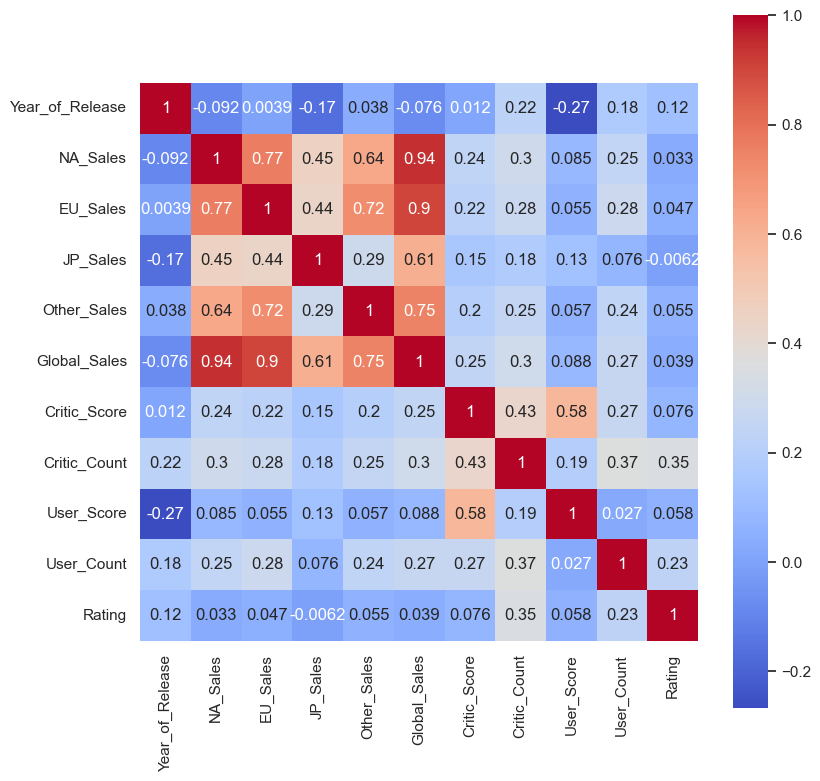

In [498]:
fig, axs = plt.subplots(nrows=1, figsize=(9, 9))
c = video_games_df.corr()
sns.heatmap(video_games_df.corr(),  annot=True, square=True, cmap='coolwarm')
plt.show()

## **2. Feature Analysis**

### **2.1 Sales**

In [499]:
sales_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

video_games_df[sales_features].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000
mean,0.264129,0.146034,0.078623,0.047670,0.536708
std,0.819028,0.507134,0.311348,0.188156,1.559885
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.030000,0.470000
max,41.360000,28.960000,10.220000,10.570000,82.530000


-Since the global sales mean is between the 75th percentile and the max value, we can see that the average is skewed upward by large outliers and is much larger than the median value.<br>
-North America is the region with the highest average sales followed by Europe, Japan, then the rest of the world.<br>

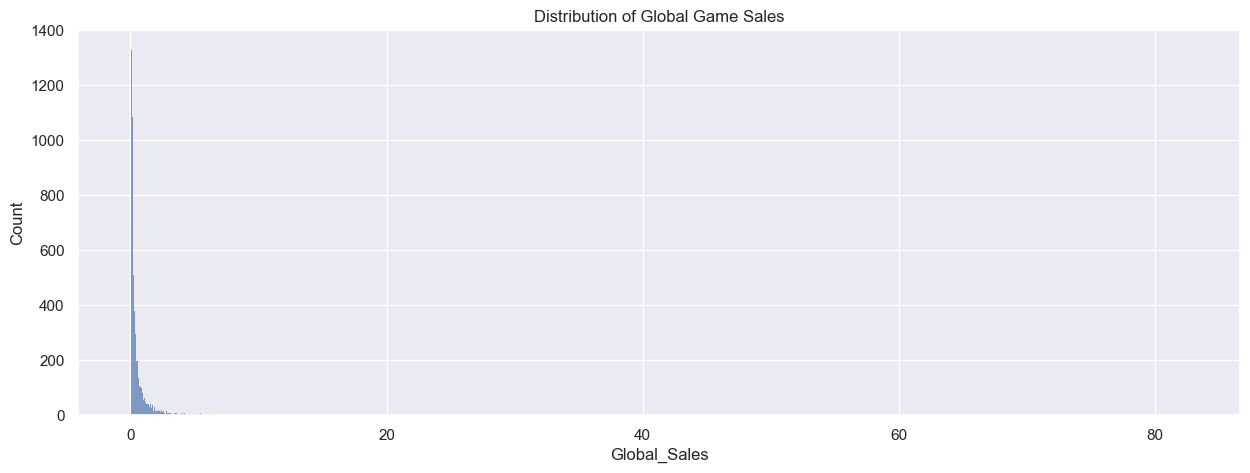

In [500]:
plt.figure(figsize=(15,5))
plt.title('Distribution of Global Game Sales')
sns.histplot(x='Global_Sales', data=video_games_df)
plt.ylim(ymin=0,ymax=1400)
plt.show()

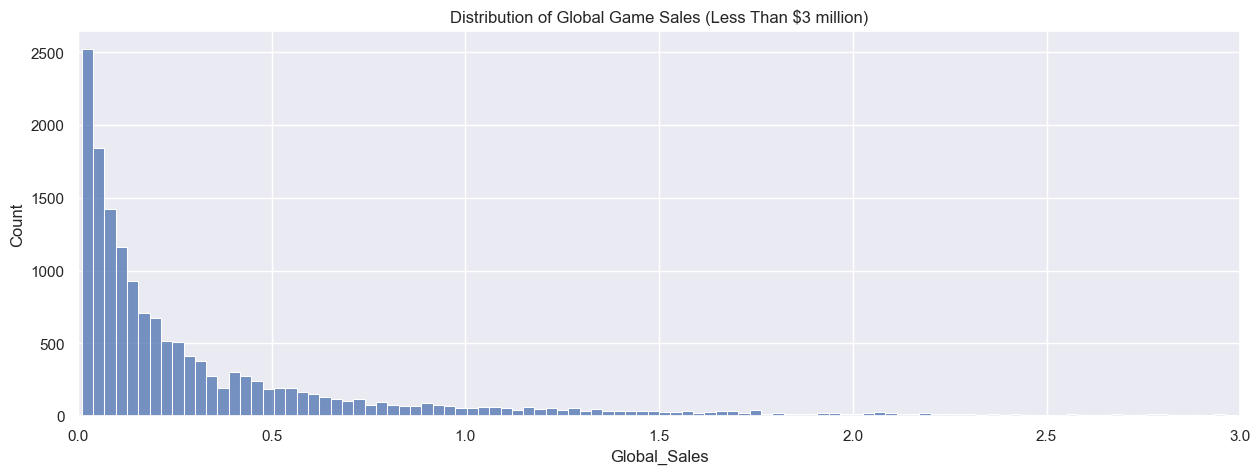

In [501]:
video_games_less_than_3 = video_games_df[video_games_df['Global_Sales'] < 3]

plt.figure(figsize=(15,5))
plt.title('Distribution of Global Game Sales (Less Than $3 million)')
sns.histplot(x='Global_Sales', data=video_games_less_than_3)
plt.xlim(xmin=0,xmax=3)
plt.show()

### **2.2 Rating Scores**

In [530]:
ratings_features = ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
video_games_df[ratings_features].describe()

,Critic_Score,Critic_Count,User_Score,User_Count
count,7982.000000,7982.000000,7461.000000,7461.000000
mean,68.997119,26.440992,71.268999,163.008846
std,13.918755,19.009305,14.988857,563.932422
min,13.000000,3.000000,0.000000,4.000000
25%,60.000000,12.000000,64.000000,10.000000
50%,71.000000,22.000000,75.000000,24.000000
75%,79.000000,36.000000,82.000000,81.000000
max,98.000000,113.000000,97.000000,10665.000000


-The average critic score is lower than the average user score.<br>
-The average number of users is much higher than the average number of critics.<br>

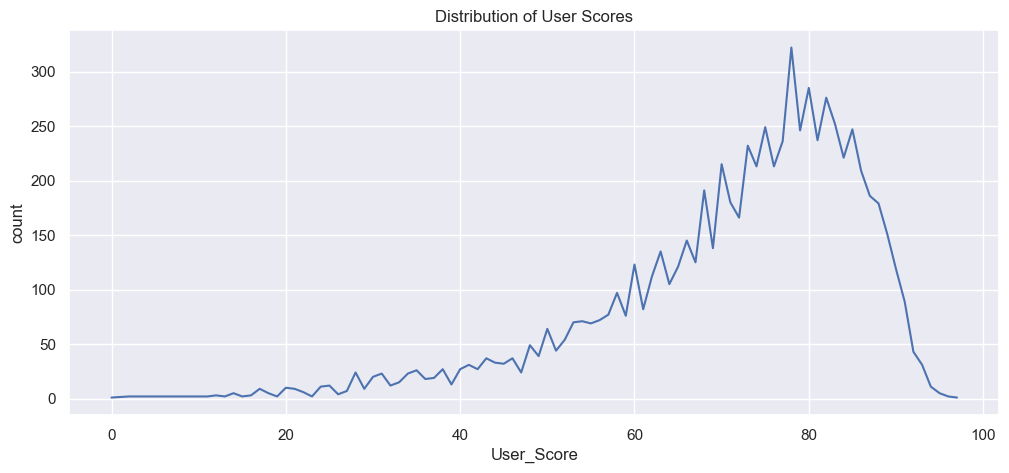

In [503]:
plt.figure(figsize=(12,5))
count_scores = video_games_df['User_Score'].value_counts(sort = False).reset_index().sort_values('index')
count_scores.columns = ['User_Score', 'count']
sns.lineplot(data=count_scores, x='User_Score', y='count')
plt.title('Distribution of User Scores')
plt.show()

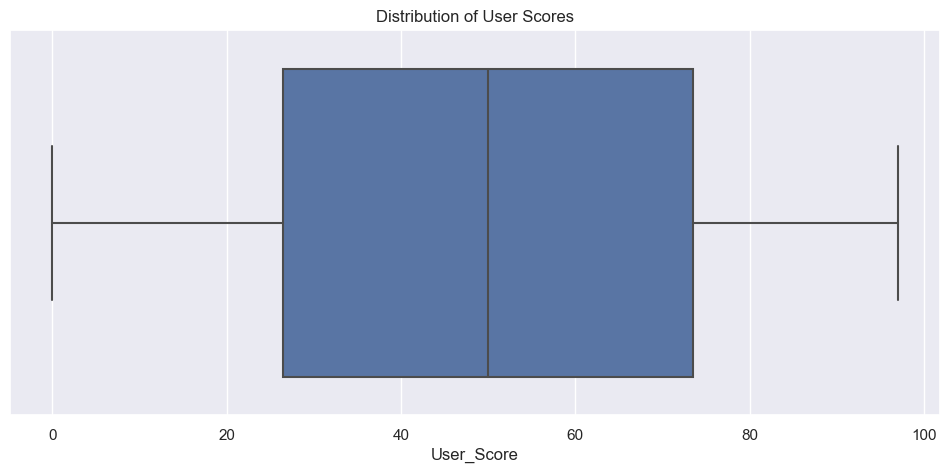

In [504]:
plt.figure(figsize=(12,5))
sns.boxplot(data=count_scores, x='User_Score')
plt.title('Distribution of User Scores')
plt.show()

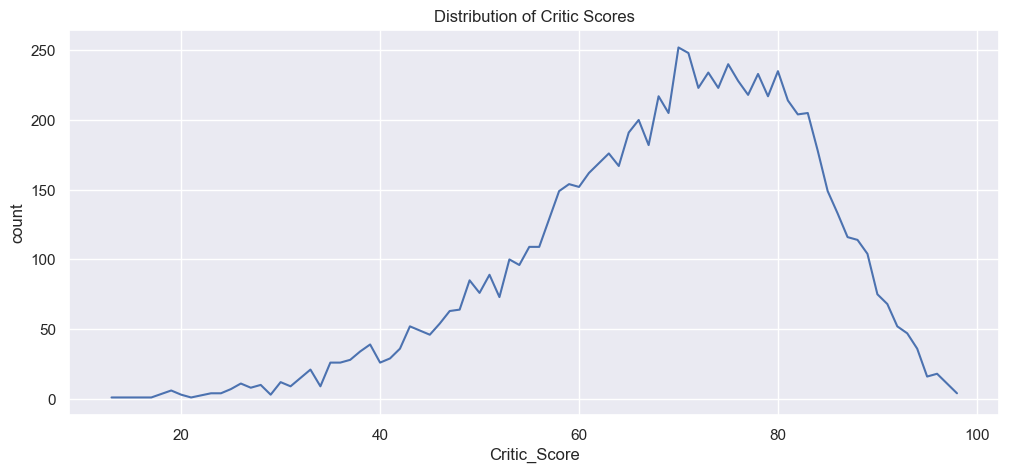

In [505]:
plt.figure(figsize=(12,5))
count_scores = video_games_df['Critic_Score'].value_counts(sort = False).reset_index().sort_values('index')
count_scores.columns = ['Critic_Score', 'count']
sns.lineplot(data=count_scores, x='Critic_Score', y='count')
plt.title('Distribution of Critic Scores')
plt.show()

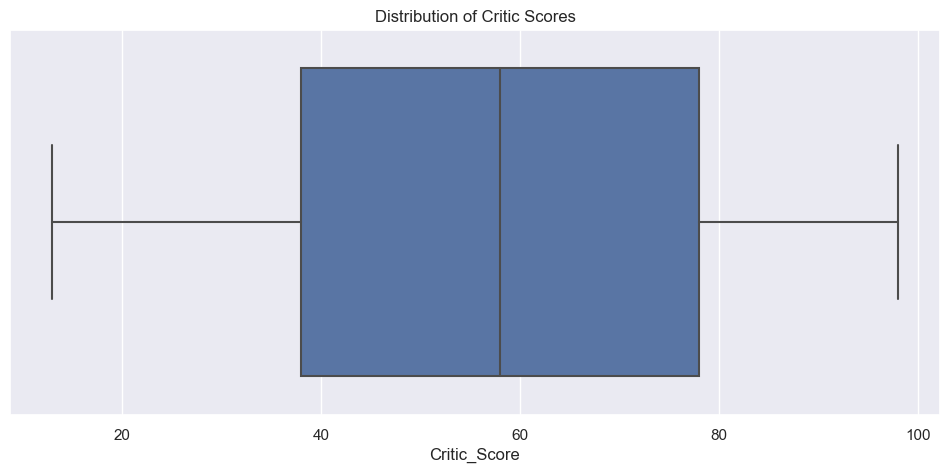

In [506]:
plt.figure(figsize=(12,5))
sns.boxplot(data=count_scores, x='Critic_Score')
plt.title('Distribution of Critic Scores')
plt.show()

### **2.3 Genre**

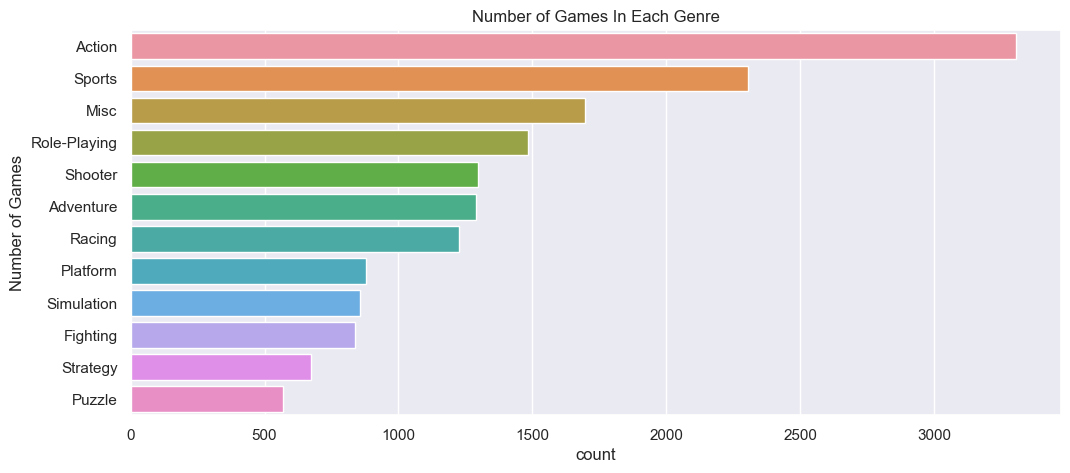

count      12.000000
mean     1368.000000
std       780.480039
min       569.000000
25%       850.500000
50%      1258.000000
75%      1536.500000
max      3307.000000
Name: Name, dtype: float64

In [507]:
plt.figure(figsize=(12,5))
plt.title('Number of Games In Each Genre')
ax = sns.countplot(y="Genre", data=video_games_df, order=video_games_df['Genre'].value_counts().index)
plt.ylabel('Number of Games')
plt.show()

genre_num_df = video_games_df.groupby('Genre', as_index=False).count()['Name']
genre_num_df.describe()

-The most common genre is action with there also being a large number of sports games.<br>

#### **Genre and Sales**

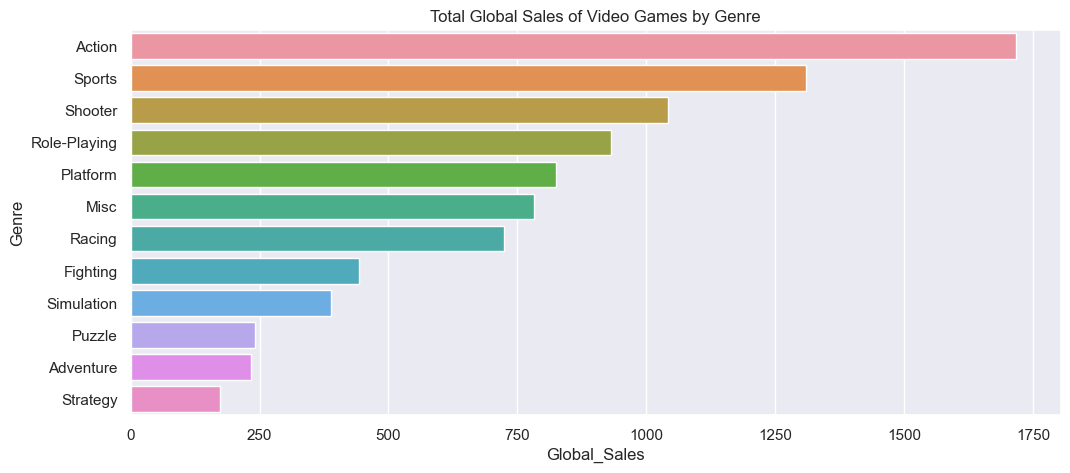

In [508]:
plt.figure(figsize=(12,5))
plt.title("Total Global Sales of Video Games by Genre")
genre_sum_df = video_games_df.groupby('Genre', as_index=False).sum()
sns.barplot(data=genre_sum_df, x='Global_Sales', y='Genre', order=genre_sum_df.sort_values('Global_Sales', ascending=False).Genre)
plt.show()

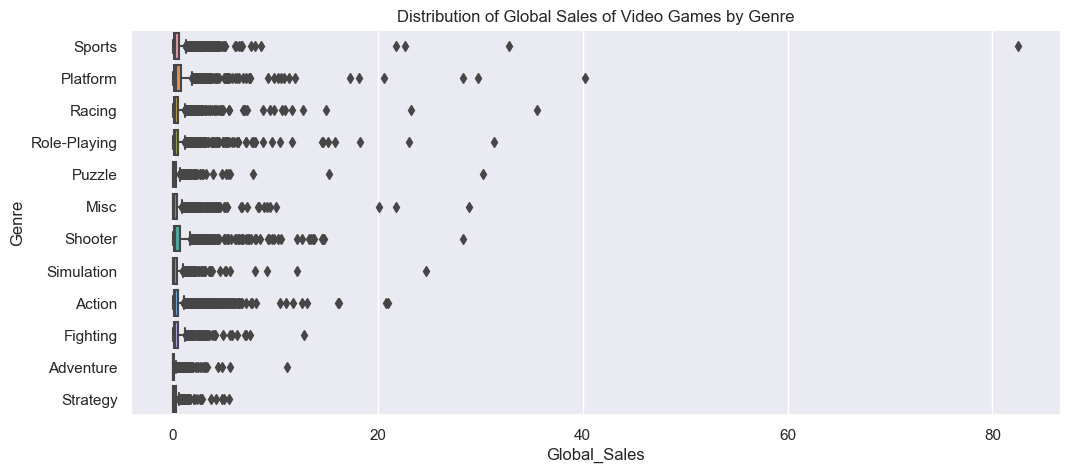

In [509]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Global Sales of Video Games by Genre")
sns.boxplot(data=video_games_df, x='Global_Sales', y='Genre')
plt.show()

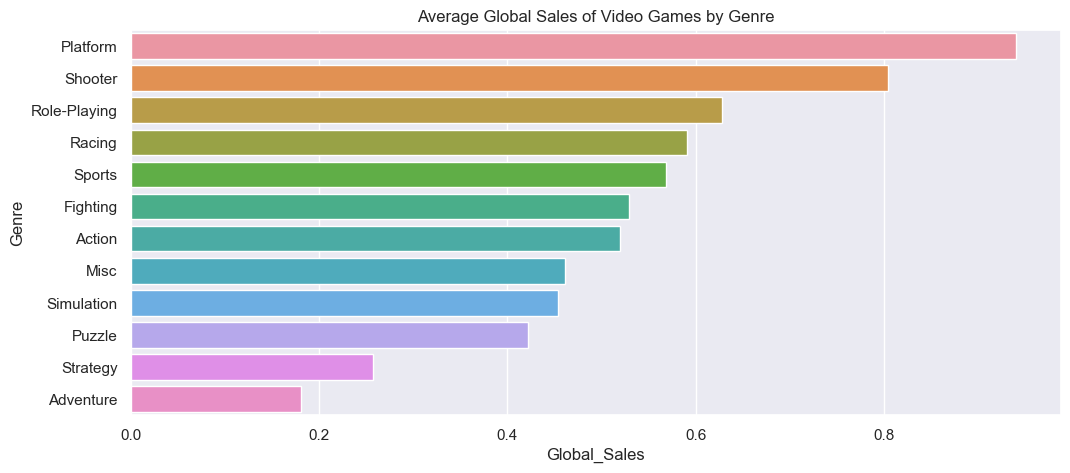

In [510]:
plt.figure(figsize=(12,5))
plt.title("Average Global Sales of Video Games by Genre")
genre_mean_df = video_games_df.groupby('Genre', as_index=False).mean()
sns.barplot(data=genre_mean_df, x='Global_Sales', y='Genre', order=genre_mean_df.sort_values('Global_Sales', ascending=False).Genre)
plt.show()

### **2.4 ESRB Rating**

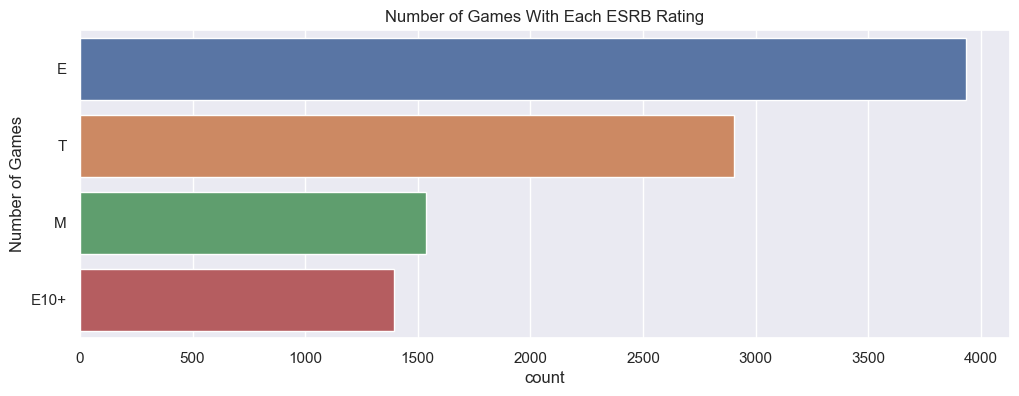

count       4.000000
mean     2441.750000
std      1204.280248
min      1394.000000
25%      1501.250000
50%      2220.500000
75%      3161.000000
max      3932.000000
Name: Name, dtype: float64

In [511]:
video_games_df['Rating'] = video_games_df['Rating'].astype(str)
video_games_df['Rating'] = video_games_df['Rating'].map(inv_rating_order)

plt.figure(figsize=(12,4))
plt.title('Number of Games With Each ESRB Rating')
ax = sns.countplot(y="Rating", data=video_games_df, order=video_games_df['Rating'].value_counts().index)
plt.ylabel('Number of Games')
plt.show()

rating_num_df = video_games_df.groupby('Rating', as_index=False).count()['Name']
rating_num_df.describe()

#### **Ratings and Sales**

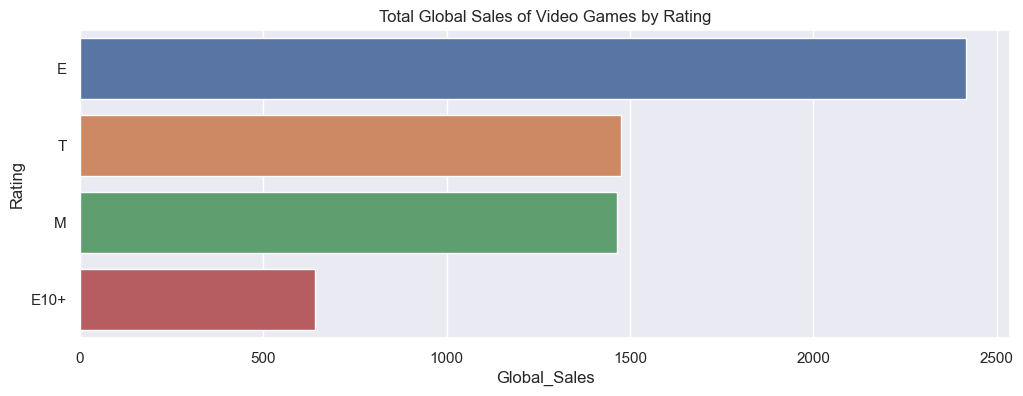

In [512]:
plt.figure(figsize=(12,4))
plt.title("Total Global Sales of Video Games by Rating")
rating_sum_df = video_games_df.groupby('Rating', as_index=False).sum()
sns.barplot(data=rating_sum_df, x='Global_Sales', y='Rating', order=rating_sum_df.sort_values('Global_Sales', ascending=False).Rating)
plt.show()

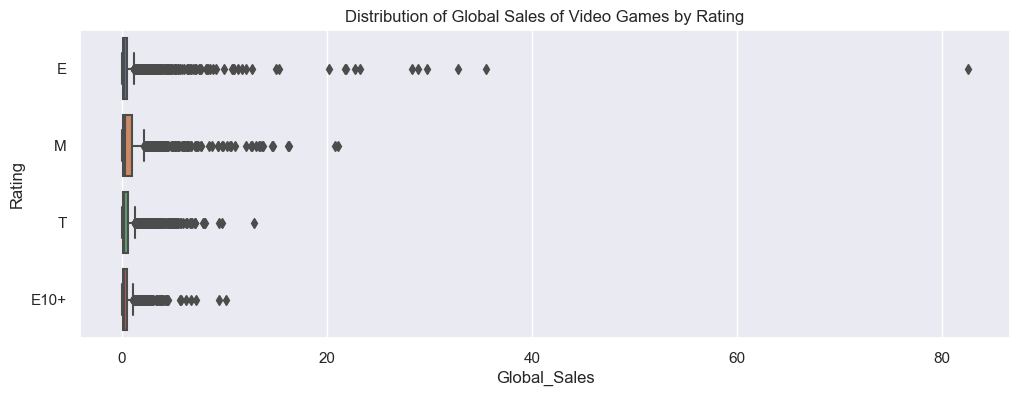

In [513]:
plt.figure(figsize=(12,4))
plt.title("Distribution of Global Sales of Video Games by Rating")
sns.boxplot(data=video_games_df, x='Global_Sales', y='Rating')
plt.show()

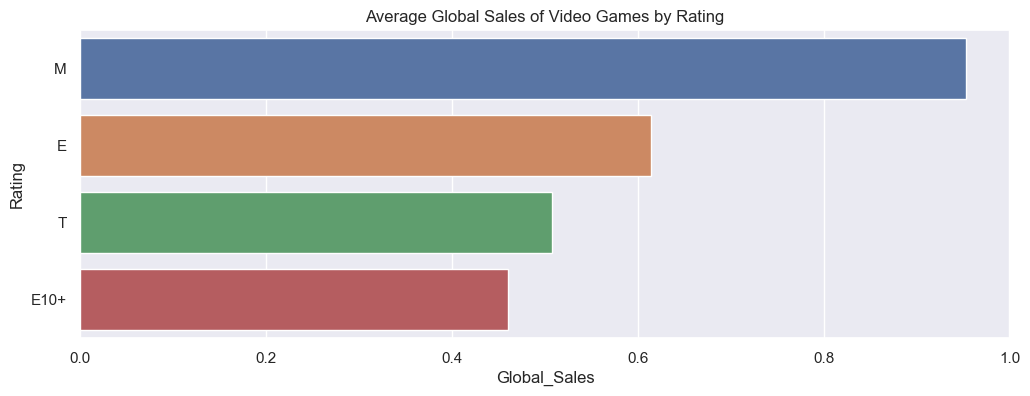

In [514]:
plt.figure(figsize=(12,4))
plt.title("Average Global Sales of Video Games by Rating")
rating_mean_df = video_games_df.groupby('Rating', as_index=False).mean()
sns.barplot(data=rating_mean_df, x='Global_Sales', y='Rating', order=rating_mean_df.sort_values('Global_Sales', ascending=False).Rating)
plt.show()

### **2.5 Platform**

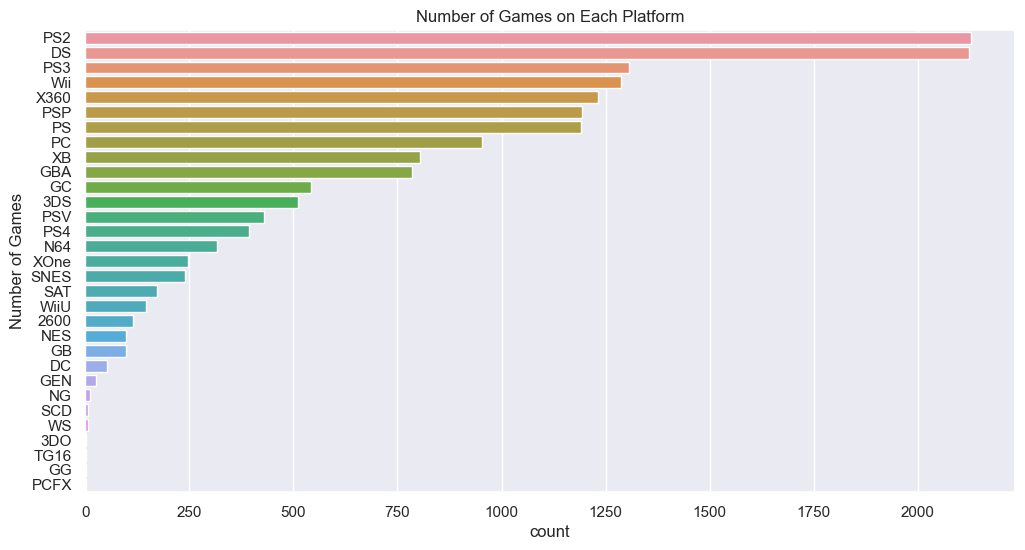

count      31.000000
mean      529.548387
std       616.968818
min         1.000000
25%        39.500000
50%       247.000000
75%       877.500000
max      2127.000000
Name: Name, dtype: float64

In [515]:
plt.figure(figsize=(12,6))
plt.title('Number of Games on Each Platform')
ax = sns.countplot(y="Platform", data=video_games_df, order=video_games_df['Platform'].value_counts().index)
plt.ylabel('Number of Games')
plt.show()

platform_num_df = video_games_df.groupby('Platform', as_index=False).count()['Name']
platform_num_df.describe()

#### **Platform and Sales**

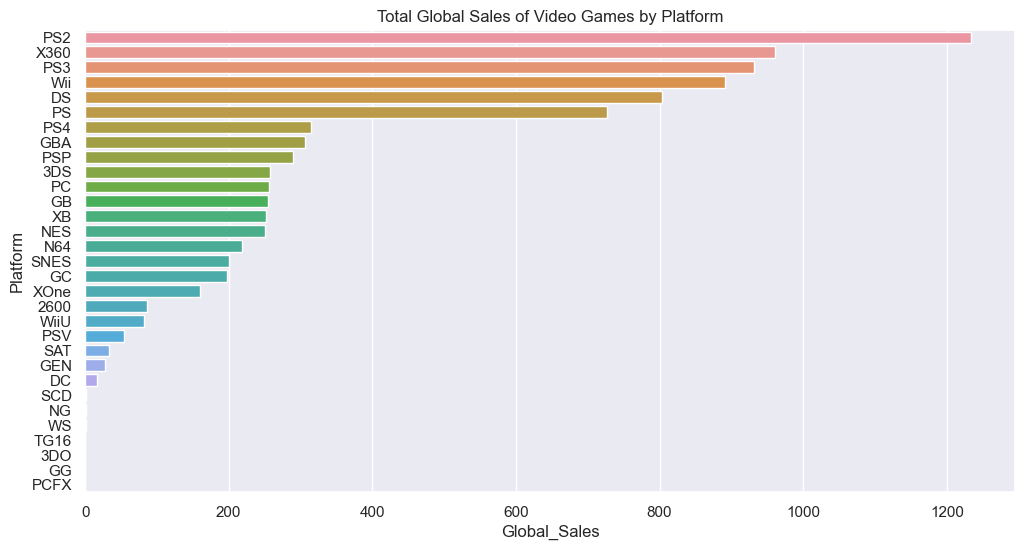

In [516]:
plt.figure(figsize=(12,6))
plt.title("Total Global Sales of Video Games by Platform")
platform_sum_df = video_games_df.groupby('Platform', as_index=False).sum()
sns.barplot(data=platform_sum_df, x='Global_Sales', y='Platform', order=platform_sum_df.sort_values('Global_Sales', ascending=False).Platform)
plt.show()

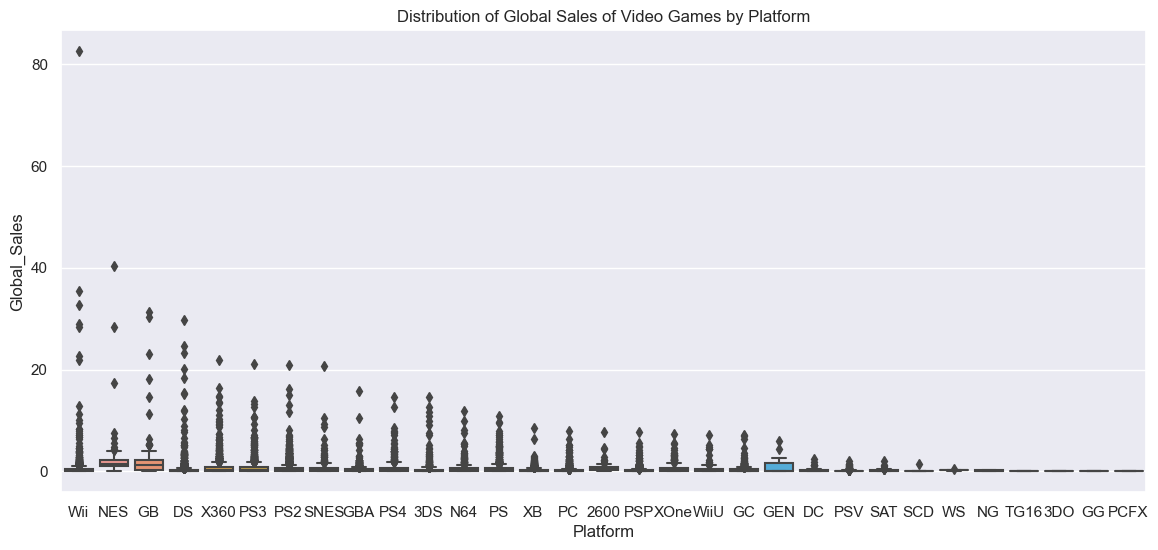

In [517]:
plt.figure(figsize=(14,6))
plt.title("Distribution of Global Sales of Video Games by Platform")
sns.boxplot(data=video_games_df, y='Global_Sales', x='Platform')
plt.show()

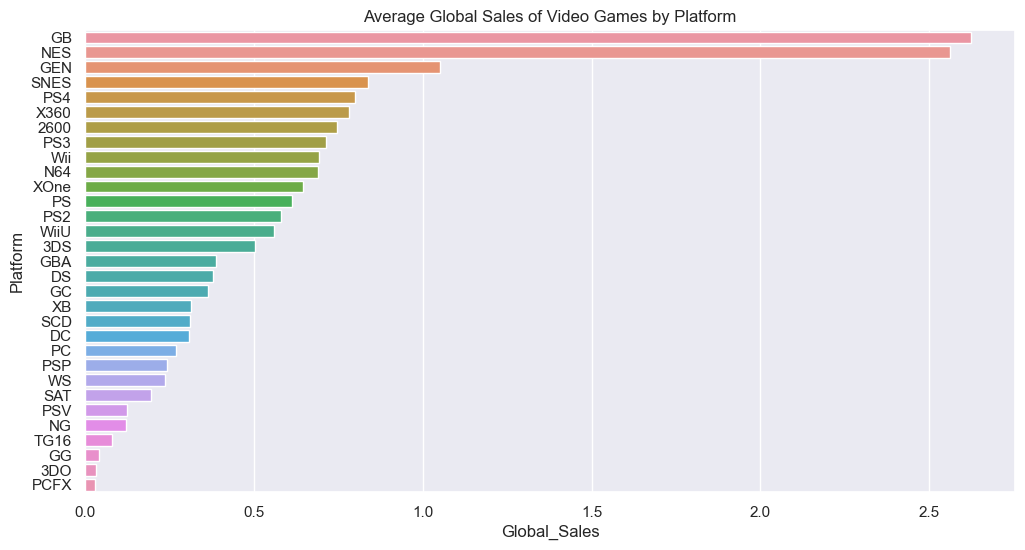

In [518]:
plt.figure(figsize=(12,6))
plt.title("Average Global Sales of Video Games by Platform")
platform_mean_df = video_games_df.groupby('Platform', as_index=False).mean()
sns.barplot(data=platform_mean_df, x='Global_Sales', y='Platform', order=platform_mean_df.sort_values('Global_Sales', ascending=False).Platform)
plt.show()

#### **Muliplatform Games**

In [519]:
multiplatform_titles = video_games_df[video_games_df['Name'].duplicated(keep=False)]
multiplatform_titles['Name'].value_counts()

Need for Speed: Most Wanted    12
LEGO Marvel Super Heroes        9
Ratatouille                     9
FIFA 14                         9
Terraria                        8
                               ..
Cool Boarders 2001              2
Quake II                        2
The Suffering                   2
High Rollers Casino             2
Akatsuki no Goei Trinity        2
Name: Name, Length: 2749, dtype: int64

In [520]:
video_games_df.loc[video_games_df.Name == 'Need for Speed: Most Wanted']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37,82.0,36.0,91.0,137.0,EA Canada,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,Electronic Arts,0.71,1.46,0.06,0.58,2.81,NaN,NaN,NaN,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012,Racing,Electronic Arts,0.62,0.78,0.01,0.15,1.56,83.0,54.0,85.0,134.0,EA Canada,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,Electronic Arts,1.00,0.13,0.02,0.10,1.25,83.0,54.0,85.0,134.0,EA Canada,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,Electronic Arts,0.53,0.46,0.00,0.05,1.04,83.0,32.0,88.0,29.0,EA Canada,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,Electronic Arts,0.33,0.45,0.01,0.22,1.01,NaN,NaN,NaN,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005,Racing,Electronic Arts,0.43,0.11,0.00,0.02,0.56,80.0,18.0,91.0,22.0,EA Canada,T
5973,Need for Speed: Most Wanted,PC,2005,Racing,Electronic Arts,0.02,0.23,0.00,0.04,0.29,82.0,19.0,85.0,525.0,Black Box,T
6274,Need for Speed: Most Wanted,WiiU,2013,Racing,Electronic Arts,0.13,0.12,0.00,0.02,0.27,NaN,NaN,NaN,NaN,NaN,NaN
6411,Need for Speed: Most Wanted,DS,2005,Racing,Electronic Arts,0.24,0.01,0.00,0.02,0.27,45.0,4.0,61.0,22.0,EA Canada,E


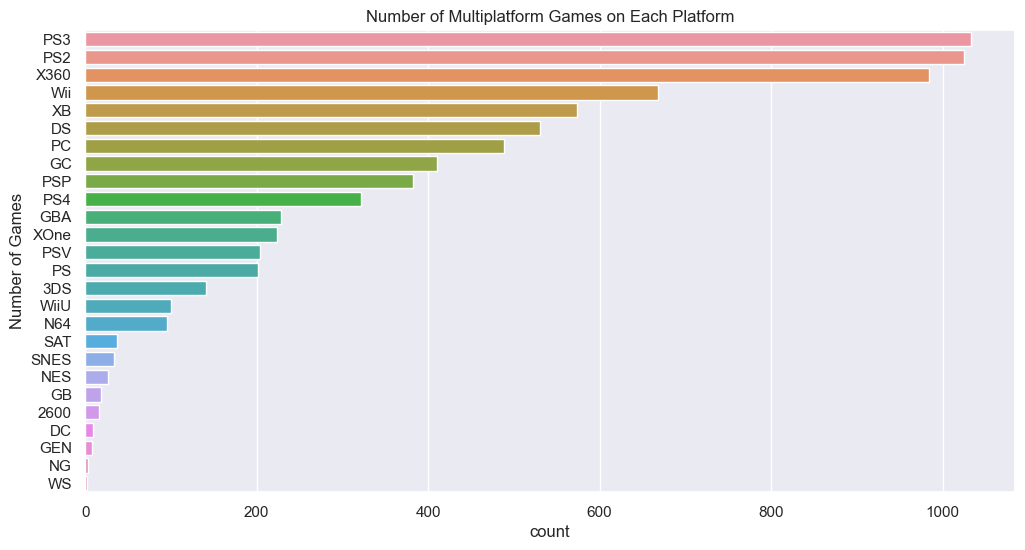

In [521]:
plt.figure(figsize=(12,6))
plt.title('Number of Multiplatform Games on Each Platform')
ax = sns.countplot(y="Platform", data=multiplatform_titles, order=multiplatform_titles['Platform'].value_counts().index)
plt.ylabel('Number of Games')
plt.show()

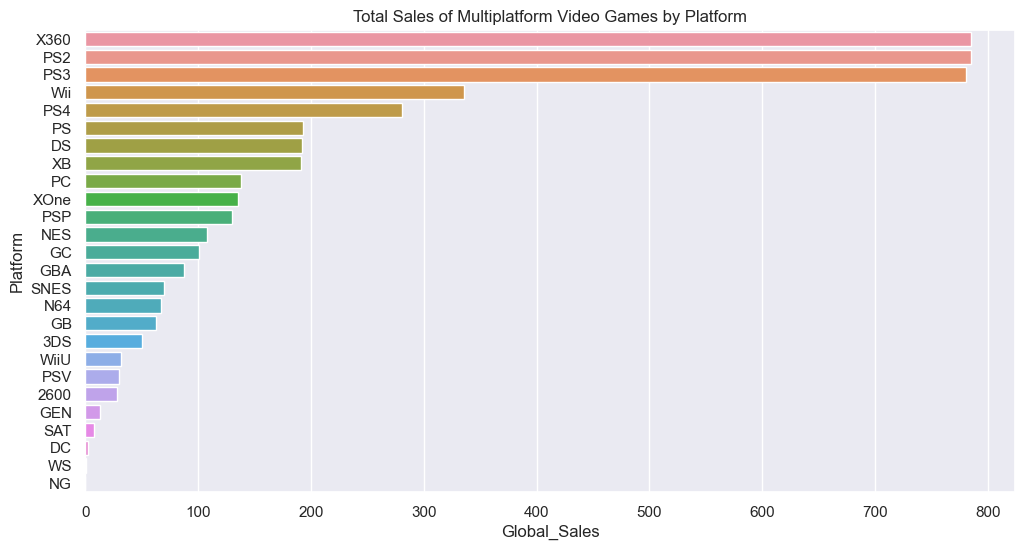

In [522]:
plt.figure(figsize=(12,6))
plt.title("Total Sales of Multiplatform Video Games by Platform")
platform_sum_df = multiplatform_titles.groupby('Platform', as_index=False).sum()
sns.barplot(data=platform_sum_df, x='Global_Sales', y='Platform', order=platform_sum_df.sort_values('Global_Sales', ascending=False).Platform)
plt.show()

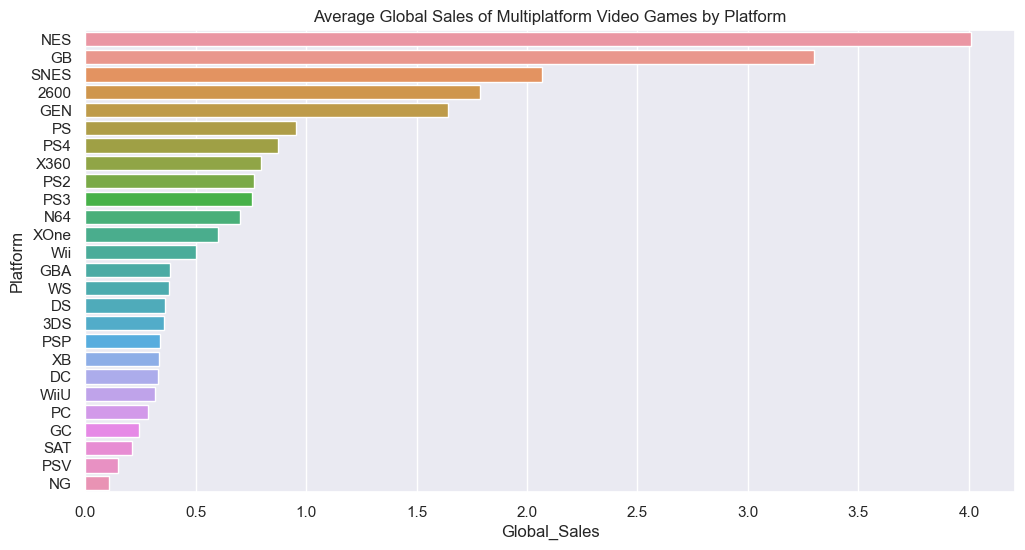

In [523]:
plt.figure(figsize=(12,6))
plt.title("Average Global Sales of Multiplatform Video Games by Platform")
platform_mean_df = multiplatform_titles.groupby('Platform', as_index=False).mean()
sns.barplot(data=platform_mean_df, x='Global_Sales', y='Platform', order=platform_mean_df.sort_values('Global_Sales', ascending=False).Platform)
plt.show()

### **2.6 Year of Release**

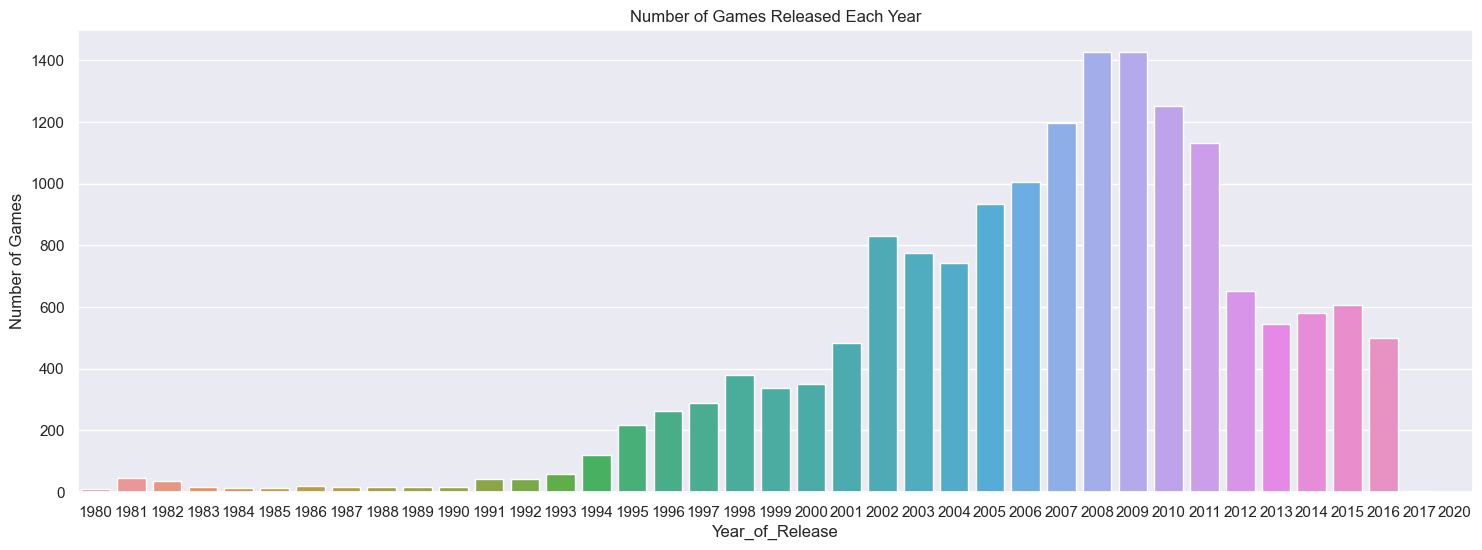

count      39.000000
mean      420.923077
std       449.744862
min         1.000000
25%        19.000000
50%       289.000000
75%       698.000000
max      1427.000000
Name: Name, dtype: float64

In [524]:
plt.figure(figsize=(18,6))
plt.title('Number of Games Released Each Year')
ax = sns.countplot(x="Year_of_Release", data=video_games_df)
plt.ylabel('Number of Games')
plt.show()

year_num_df = video_games_df.groupby('Year_of_Release', as_index=False).count()['Name']
year_num_df.describe()

#### **Year of Release and Sales**

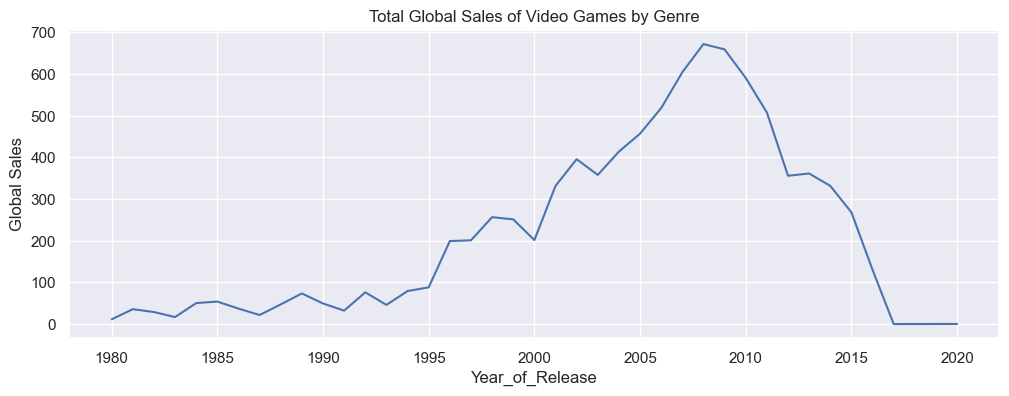

In [525]:
year_sum_df = video_games_df.groupby('Year_of_Release', as_index=False).sum()
plt.figure(figsize=(12,4))
plt.title("Total Global Sales of Video Games by Genre")
ax = sns.lineplot(x="Year_of_Release", y='Global_Sales', data=year_sum_df)
plt.ylabel('Global Sales')
plt.show()

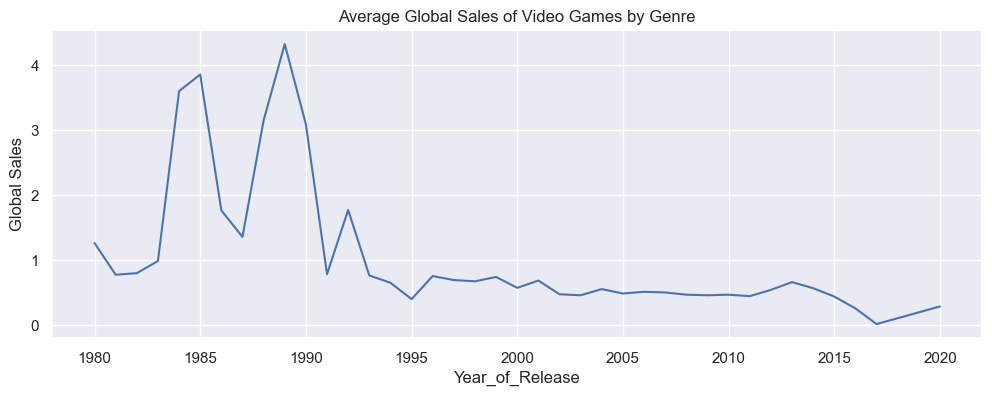

In [526]:
year_mean_df = video_games_df.groupby('Year_of_Release', as_index=False).mean()
plt.figure(figsize=(12,4))
plt.title("Average Global Sales of Video Games by Genre")
ax = sns.lineplot(x="Year_of_Release", y='Global_Sales', data=year_mean_df)
plt.ylabel('Global Sales')
plt.show()

## **2.7 Developer**

In [527]:
video_games_df['Developer'].value_counts()

Ubisoft                      201
EA Sports                    169
EA Canada                    164
Konami                       158
Capcom                       137
                            ... 
Zombie                         1
Le Cortex                      1
Hypnos                         1
Genki, Kojima Productions      1
Interchannel-Holon             1
Name: Developer, Length: 1680, dtype: int64

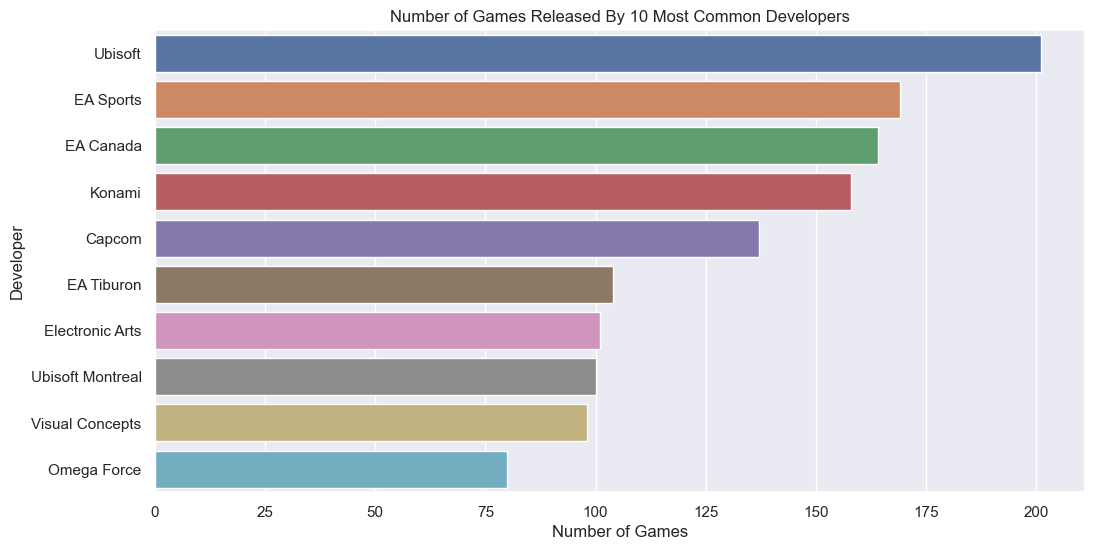

In [528]:
developers = video_games_df.groupby('Developer')['Name'].count().sort_values(ascending=False).iloc[:10]
developers = developers.to_frame(name='num_games')
developers['Developer'] = developers.index
developers.index = range(len(developers.index))

plt.figure(figsize=(12,6))
plt.title('Number of Games Released By 10 Most Common Developers')
ax = sns.barplot(y="Developer", x='num_games', data=developers)
plt.xlabel('Number of Games')
plt.show()

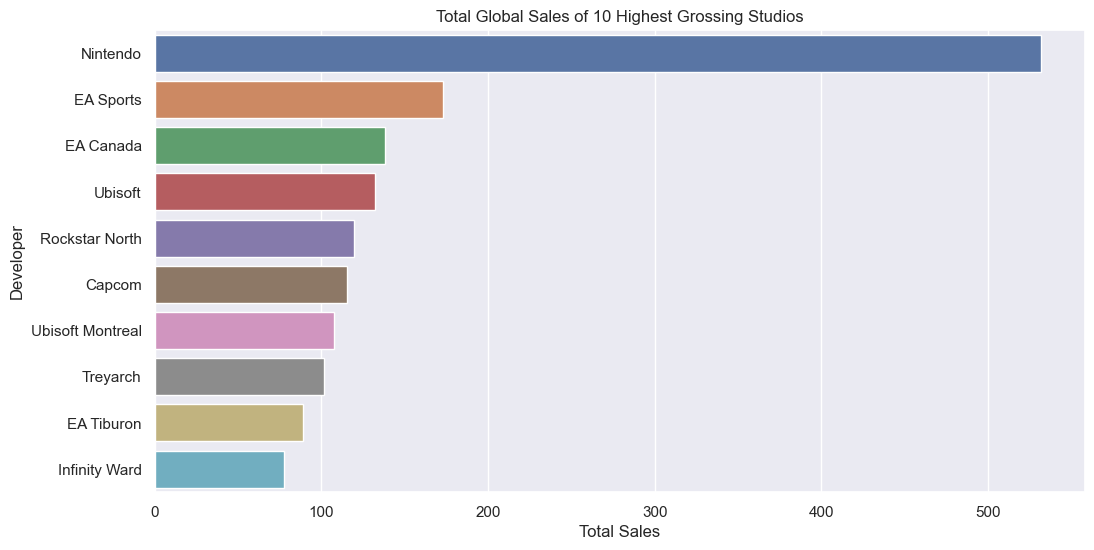

In [529]:
dev_total = video_games_df.groupby('Developer')['Global_Sales'].sum().sort_values(ascending=False).iloc[:10]
dev_total = dev_total.to_frame(name='total_sales')
dev_total['Developer'] = dev_total.index
dev_total.index = range(len(dev_total.index))

plt.figure(figsize=(12,6))
plt.title('Total Global Sales of 10 Highest Grossing Studios')
ax = sns.barplot(y="Developer", x='total_sales', data=dev_total)
plt.xlabel('Total Sales')
plt.show()